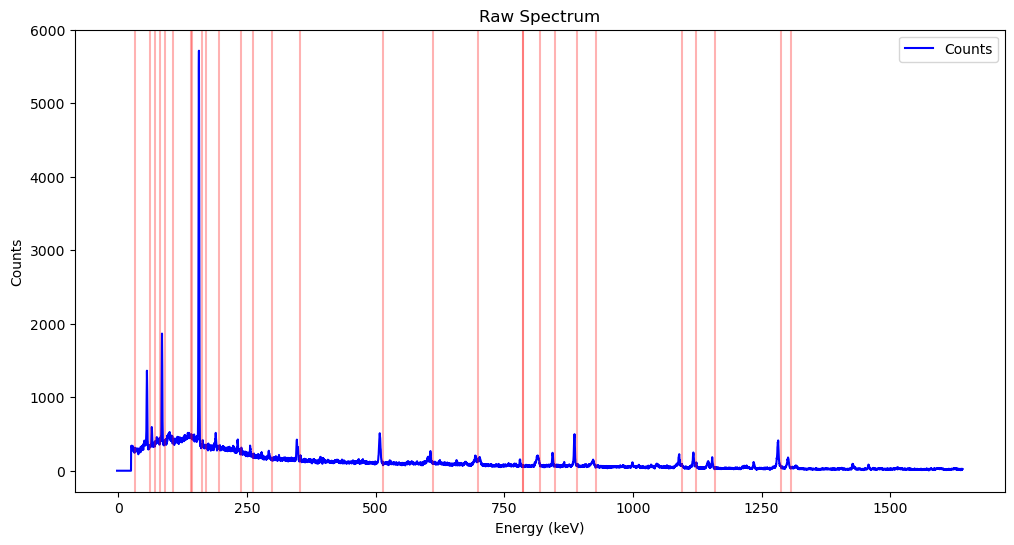

In [122]:
import requests
import random
import numpy as np
import pandas as pd
import scipy.signal as scipy
import scipy.optimize as scipyo
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.colors as mcolors
from matplotlib import cm
from itertools import combinations
from itertools import permutations

# This cell imports libraries, displays a piece of real spectrum data, and defines plotting functions.


github_url = "https://raw.githubusercontent.com/JPittard10/Isomer-Project/refs/heads/main/Trimmed%20and%20Bunched%20Spectrums/A1_Cl37_c10_HPGe_301sec_trimmed.txt"

response = requests.get(github_url)

data1 = response.text
data1_array = np.array(list(map(int, data1.split())))
bin_array = list(range(1,(len(data1_array)+1)))

Energy_bin = 0.64844 + 0.27383 * np.array((np.array(bin_array)) - 12.5)



# Name: Sir_Peaks_plotalot
# Purpose : plots a line on the spectrum plot where the peak was identified
# Creator : James Pittard - 29 / FEB / 2025
# Function : sir_peaks_printsalot( the array for where peaks want to be identified, name of the plot where the peak lines will be displayed i.e plot1 )



def sir_peaks_plotalot(plot_array, plot_name):
    plot_peaks, _ = scipy.find_peaks(plot_array, prominence = 1e2)
    plot_peaks_energy = (0.64844 + 0.27383 * np.array((plot_peaks) - 12.5))+6
    for peak in plot_peaks_energy:
        plot_name.axvline(x = peak, color = 'red', alpha = 0.3)
    return(plot_peaks)


# Name: Sir_Peaks_displayalot
# Purpose : displays the energy of the peaks and their respective counts from greatest to largest count, and prints all of the peaks
#           in order from the left to right side of the array
# Creator : James Pittard - 29 / FEB / 2025
# Function : sir_peaks_displayalot( the array for where peaks want to be identified, the name of the array must start with a " ' " and end with a " ' " )

def sir_peaks_displayalot(plot_array, plot_name):
    plot_peaks, _ = scipy.find_peaks(plot_array, prominence = 1e2)
    plot_peaks_energy = (0.64844 + 0.27383 * np.array((plot_peaks) - 12.5))+6
    peak_counts = plot_array[plot_peaks]
    sorted_peaks = np.argsort(peak_counts)[::-1]
    print(f"Sorted Peaks For Plot '{plot_name}'")
    print("Peak Energy (keV) | Counts")
    print("-----------------------------")
    for i in sorted_peaks:
        peak_index = plot_peaks[i]
        formatted_peak_energy = f"{plot_peaks_energy[i]:<17.3f}"
        formatted_counts = f"{plot_array[peak_index]:<10.0f}"
        print(f"{formatted_peak_energy} | {formatted_counts}")
    print("-----------------------------")
    print(f"Peaks For Plot '{plot_name}'")
    print("Peak Energy (keV)")
    for energy in plot_peaks_energy:
        print(f"{energy:<0.3f}")
    print("-----------------------------\n\n")

# Name: Plot_func
# Purpose: displays spectrum data plainly without labeling peaks
# Creator: James Pittard
# Function: plot_func(x-axis of data, y-axis of data, name of x-axis, name of y-axis, name of graph, x-axis units, y-axis units, color)

def plot_func(x_axis_data, y_axis_data, x_axis_name, y_axis_name, title_name, x_axis_unit, y_axis_unit, color_type):
    spec_plot = pd.DataFrame({x_axis_name: x_axis_data, y_axis_name: y_axis_data})
    plot = spec_plot.plot(x = x_axis_name, y = y_axis_name, title = title_name,
                          xlabel = x_axis_unit, ylabel = y_axis_unit, color = color_type, figsize = (12,6))
    return(plot)
    
# Name: Plot_peaks_func
# Purpose: displays spectrum data and identifies and labels peaks on the data
# Creator: Mason Levere
# Function: plot_peaks_func(x-axis of data, y-axis of data, name of x-axis, name of y-axis, name of graph, x-axis units, y-axis units, color (default of blue))
    
def plot_peaks_func(x_axis_data, y_axis_data, x_axis_name, y_axis_name, title_name,
                    x_axis_unit, y_axis_unit, color_type='blue'):
    # detect peaks (prominence at 1e2, should be changed)
    plot_peaks, _ = scipy.find_peaks(y_axis_data, prominence=1e2)
    peak_energies = x_axis_data[plot_peaks]
    peak_counts = y_axis_data[plot_peaks]
    sorted_peaks = np.argsort(peak_counts)[::-1]

    # create df and plot
    spec_plot = pd.DataFrame({x_axis_name: x_axis_data, y_axis_name: y_axis_data})
    ax = spec_plot.plot(x=x_axis_name, y=y_axis_name, title=title_name,
                        xlabel=x_axis_unit, ylabel=y_axis_unit, color=color_type, figsize=(12, 6))

    # label peaks
    peak_list = []
    for i in sorted_peaks:
        x = peak_energies[i]
        peak_list.append(x)
        y = peak_counts[i]
        ax.plot(x, y, 'ro')  # red circle marker
        ax.text(x, y, f"{x:.1f} keV\n{int(y)}", fontsize=8, ha='center', va='bottom', rotation=0)

    print(np.sort(np.round(peak_list, 1)))
        

    plt.tight_layout()
    return ax

# Name: get_nice_colors
# Purpose: generates "n" random colors 
# Creator: Mason Levere
# Function: get_nice_colors(number of colors, color map pool)

def get_nice_colors(n, cmap_name='tab10'):
    cmap = plt.cm.get_cmap(cmap_name)
    return [cmap(i % cmap.N) for i in range(n)]

# Name: get_random_named_color
# Purpose: chooes a random color from CSS4 pool
# Creator: Mason Levere
# Function: get_random_named_color()

def get_random_named_color():
    return random.choice(list(mcolors.CSS4_COLORS.keys()))


# Name: Plot_func_ladders
# Purpose: plots ladder arrays in different colors for readability
# Creator: Mason Levere
# Function plot_func_ladders(x-range, list of ladder arrays, x-axis name, y-axis name, plot name, x-axis units, y-axis units, color pool)

def plot_func_ladders(x_axis_data, y_axis_data, x_axis_name, y_axis_name, title_name, x_axis_unit, y_axis_unit, color_type):

    # create df with one column for each y dataset
    data = {x_axis_name: x_axis_data}
    for i, y in enumerate(y_axis_data):
        data[f"{y_axis_name}_{i+1}"] = y
    spec_plot = pd.DataFrame(data)

    # generate color list
    colors = get_nice_colors(len(y_axis_data))

    # plot all y-columns 
    y_columns = [f"{y_axis_name}_{i+1}" for i in range(len(y_axis_data))]
    spec_plot.plot(
        x=x_axis_name,
        y=y_columns,
        title=title_name,
        xlabel=f"{x_axis_name} ({x_axis_unit})",
        ylabel=f"{y_axis_name} ({y_axis_unit})",
        color=colors,
        figsize=(12, 6)
    )

    plt.show()
    return()

raw_spec_plot = plot_func(Energy_bin, data1_array, 'Energy', 'Counts', 'Raw Spectrum', 'Energy (keV)', 'Counts', 'blue')
peaks_raw_spec = sir_peaks_plotalot(data1_array, raw_spec_plot)


#should plot based on FHWM
#------------ rel_height at 0.3 for background -------------#

#width, width_heights, left_ips, right_ips = scipy.peak_widths(data1_array, peaks_raw_spec, rel_height=0.3)



In [162]:
# 1D plot building functions


# Name: Gaussian_peak
# Purpose: creates a gaussian
# Creator: Mason Levere
# Function: gaussian_peak(x bins, amplitude, center, standard deviation)

def gaussian_peak(x, A, mu, sigma):

    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    

# Name: Peak_inserter
# Purpose: generate y-values of gaussian peaks based off of real spectroscopy data (1D)
# Creator: Mason Levere
# Function: peak_inserter(x-axis, list of index values of peaks in x-axis, list of peak widths, y-values of spectroscopy data)

def peak_inserter(Energy_bin, peaks, width, data1_array):
    num_peaks = len(peaks)
    just_peaks = np.zeros(len(Energy_bin))
    print(peaks)
    for i in range(len(peaks)):
        peak_index = peaks[i]
        peak_height = data1_array[peak_index]
        sd = width[i]/2
        left = np.int64(np.ceil(peak_index - ((2*width[i])/0.27383)))
        right = np.int64(np.ceil(peak_index + ((2*width[i])/0.27383)))
        x_range = np.array(range(left, right))
        gaussian_part = gaussian_peak(x_range, peak_height, x_range[int((right-left)/2)], sd)
        int_indices = np.clip(np.round(x_range).astype(int), 0, len(just_peaks) - 1)
        np.add.at(just_peaks, int_indices, gaussian_part)
        
    return just_peaks

# Name: Peak_inserter_ladder
# Purpose: generates the arrays for ladders seperately and also gives the boundaries and integrals of the peaks (1D)
# Creator: Mason Levere
# Function: peak_inserter_ladder(x-range, list of lists of peaks, list of lists of peak heights, list of lists of widths)

def peak_inserter_ladder(Energy_bin, peaks, peak_height, width):
    peak_arrays = []
    boundaries = []
    integrals = []
    for j in range(len(peaks)): 
        num_peaks = len(peaks[j])
        just_peaks = np.zeros(len(Energy_bin))
        boundary = []
        integral = []
        for i in range(len(peaks[j])):
            peak_index = peaks[j][i]
            peak_height_num = peak_height[j][i]
            sd = width[j][i]/2
            left = np.int64(np.ceil(peak_index - ((width[j][i])/0.27383)))
            right = np.int64(np.ceil(peak_index + ((width[j][i])/0.27383)))
            x_range = np.array(range(left, right))

            gaussian_part = gaussian_peak(x_range, peak_height_num, x_range[int((right-left)/2)], sd)
            int_indices = np.round(x_range).astype(int)
            int_indices = np.clip(int_indices, 0, len(just_peaks) - 1)
            np.add.at(just_peaks, int_indices, gaussian_part)
            
            total_counts = np.int64(np.sum(gaussian_part))
            boundary.append([left, right])
            integral.append(total_counts)
        peak_arrays.append(just_peaks)
        boundaries.append(boundary)
        integrals.append(integral)
       
    return(peak_arrays, boundaries, integrals)


# Name: add_ladders
# Purpose: takes multiple ladders in 1D and shows their sum
# Creator: Mason Levere
# Function: add_ladders(list of ladder arrays)

def add_ladders(ladders):
    matrix = np.sum(ladders, axis = 0)
    return(matrix)



In [244]:
# 1D and 2D ladder parameter functions

# Name: Generate_ladder
# Purpose: Creates the positions, heights, and widths for a ladder within a given range of x values. 
# If the ladder is out of bounds, it resets and tries again. By default, it will generate a ldadder based on random parameters, 
# but parameters can be passed to fix certain values.
# It also generates random values for ground decay.
# (needs some work)
# Creator: Mason Levere
# Function: generate_ladder(x boundaries, fixed width for each peak, accuracy of detector, number of rungs in ladder, 
# inital x. initial y, distance between rungs)

def generate_ladder(Energy_bin, width, accuracy, rungs=None, x0=None, y0=None, d0=None):
    if rungs == None:
        rungs = np.random.randint(3, 5)
    if x0 == None:
        x0 = np.random.randint(0, len(Energy_bin))
    if y0 == None:
        y0 = np.random.randint(150, 1000)
    if d0 == None:
        d0 = np.random.randint(30, 400)
    
    # widths made bigger for now
    positions = [x0]
    heights = [y0]
    widths = [np.int64(np.random.normal(np.mean(width), accuracy))*5]

    for j in range(1, rungs):
        rung_index = positions[j - 1] + np.int64(d0 * np.random.normal(1, accuracy))
        if rung_index >= len(Energy_bin) - 1:
            return None  # failed ladder
        rung_height = np.int64(heights[j - 1] * np.random.uniform(0.5, 0.9))
        # width changed here too
        rung_width = np.int64(np.random.normal(np.mean(width), accuracy)) * 5

        positions.append(rung_index)
        heights.append(rung_height)
        widths.append(rung_width)

    # ground transition (WIP)
    ground_transition_energy = np.random.randint(0, len(Energy_bin))
    ground_tranisition_intensity = np.int64((1/(np.random.uniform(0.5, 0.9)))* heights[0])
    ground_tranisition_width = np.int64(np.random.normal(np.mean(width), accuracy))*5
    positions.insert(0, ground_transition_energy)
    heights.insert(0, ground_tranisition_intensity)
    widths.insert(0, ground_tranisition_width)

    return positions, heights, widths


# Name: Peak_ladder
# Purpose: generates multiple ladders and outputs their parameters
# Creator: Mason Levere
# Function: peak_ladder(number of ladders, accuracy of detector, chance of a 'split' (idea of split needs work), width (default to 5 for convenience)

def peak_ladder(num_ladders, accuracy, split_chance = 0, width = 5):
    peak_index = []
    peak_height = []
    peak_width = []

    i = 0
    while i < num_ladders:
        split = random.random() <= split_chance
        result = generate_ladder(Energy_bin, width, accuracy, 3)
        if result is not None:
            positions, heights, widths = result
            peak_index.append(positions)
            peak_height.append(heights)
            peak_width.append(widths)
            i += 1
        if split:
            index = random.randint(0, len(positions)-1)
            x0 = positions[index]
            y0 = heights[index]
            d0 = np.random.randint(30, 400)
            
            result = generate_ladder(Energy_bin, width, accuracy, 3, x0, y0, d0)
            if result is not None:
                positions, heights, widths = result
                peak_index.append(positions)
                peak_height.append(heights)
                peak_width.append(widths)
                i += 1


    return peak_index, peak_height, peak_width

# Name: made_dict
# Purpose: make a dictionary given two lists of same dimension
# Creator: Mason Levere
# Function: make_dict(list of keys, corresponding list of values)

def make_dict(keys, values):
    return dict(zip(keys, values))

# Name: TwoDParameters
# Purpose: generates coordinates, amplitudes, and widths of peaks for a 2D matrix
# Creator: Mason Levere
# Function: TwoDParameters(list of lists of peak_indexs, list of lists for coincidences (this is taken from 
# the visual of a level scheme, counts are proportional to amplitudes due to plotting within a set sd), list of lists of peak widths)


def TwoDParamaters(peak_index, peak_height, peak_width):
    peak_index_parameter = []
    peak_height_parameter = []
    peak_width_parameter = []
    for i in range(len(peak_index)):
        lst_index = peak_index[i]
        lst_height = peak_height[i]
        lst_width = peak_width[i]
        lst_height_width = list(zip(lst_height, lst_width))
        index_height_dic = make_dict(lst_index, lst_height_width)
        coordinates = list(permutations(lst_index, 2))
        heights = [min([index_height_dic[item][0] for item in tup]) for tup in coordinates]
        widths = [tuple(index_height_dic[x][1] for x in tup) for tup in coordinates]
        peak_index_parameter.append(coordinates)
        peak_height_parameter.append(heights)
        peak_width_parameter.append(widths)
         
    peak_index_parameter = [tup for sublist in peak_index_parameter for tup in sublist]
    peak_height_parameter = list(np.ravel(peak_height_parameter))
    peak_width_parameter = [tup for sublist in peak_width_parameter for tup in sublist]

    return(peak_index_parameter, peak_height_parameter, peak_width_parameter)
    


In [246]:
# 2D Functions


# Name: GateVertical
# Purpose: takes a vertical gate of a 2D matrix
# Creator: Mason Levere
# Function: GateVertical(2D matrix, center of gate, width from center of gate)

def GateVertical(matrix, energy, gate_width = 60):
    channel = EnergytoChannel(energy)
    gate_width = EnergytoChannel(gate_width)
    arrays = (matrix[:][(channel-gate_width):(channel+gate_width)])
    array = np.sum(arrays, axis=0)
    return(array)

# Name: GateHorizontal
# Purpose: takes a horizontal gate of a 2D matrix
# Creator: Mason Levere
# Function: GateHorizontal(2D matrix, center of gate, width from center of gate)

def GateHorizontal(matrix, energy, gate_width = 60):
    channel = EnergytoChannel(energy)
    gate_width = EnergytoChannel(gate_width)    
    arrays = (matrix[(channel-gate_width):(channel+gate_width)][:])
    array = np.sum(arrays, axis=0)
    return(array)
    
# Name: EnergytoChannel
# Purpose: takes an energy and converts to a channel index
# Creator: Mason Levere
# Function: EnergytoChannel(energy)

def EnergytoChannel(energy):
    channel_number = np.int64((energy - 6.64844) / 0.27383 + 12.5)
    return(channel_number)

# Name: Gate
# Purpose: Gate on a 2D matrix given a center energy and width
# Creator: Mason Levere
# Function: Gate(2D matrix)

def Gate(matrix): 
    while True:
        gate_input = input('Gate Energy? (return to escape)')
        if gate_input == '':
            break
        else:
            gate = int(gate_input)
        width_input = input('Width (default of 20 keV): ')
        if width_input == '':
            width = 20
        else:
            width = int(width_input)
        x1 = GateVertical(matrix, gate, width)
        plot_peaks_func(Energy_bin, x1, 'Energy', 'Counts', f'Gate at {gate}kEv from {gate-width} to {gate+width}', 'Energy (keV)', 'Counts', 'blue')
        plt.show()

# Name: TotalProjection
# Purpose: gives a 1D coincidence view of a 2D matrix by summing down on the rows
# Creator: Mason Levere
# Function: TotalProjection(2D matrix)

def TotalProjection(matrix):
    array = np.sum(matrix, axis=0)
    plot_peaks_func(Energy_bin, array, 'Energy', 'Counts', 'Total Projection', 'Energy (keV)', 'Counts', 'blue')
    return()

#need better gating width

In [248]:
# This cell needs to be run first, it generates the parameters for the 2D matrix.

num_ladders = 4

peak_index, peak_height, peak_width = peak_ladder(num_ladders, 0.02)


peak_index_parameter, peak_height_parameter, peak_width_parameter = TwoDParamaters(peak_index, peak_height, peak_width)


print('Peak Amplitudes:', peak_height_parameter)
print('')
print('Peak Coordinates:', peak_index_parameter)
print('')
print('Peak Widths:', peak_width_parameter)


# 4 bands with 4 transitions (can vary transitions in a band)

Peak Amplitudes: [524, 431, 355, 524, 431, 355, 431, 431, 355, 355, 355, 355, 795, 590, 340, 795, 590, 340, 590, 590, 340, 340, 340, 340, 778, 556, 296, 778, 556, 296, 556, 556, 296, 296, 296, 296, 247, 148, 104, 247, 148, 104, 148, 148, 104, 104, 104, 104]

Peak Coordinates: [(3658, 1127), (3658, 1427), (3658, 1730), (1127, 3658), (1127, 1427), (1127, 1730), (1427, 3658), (1427, 1127), (1427, 1730), (1730, 3658), (1730, 1127), (1730, 1427), (4008, 4590), (4008, 4920), (4008, 5239), (4590, 4008), (4590, 4920), (4590, 5239), (4920, 4008), (4920, 4590), (4920, 5239), (5239, 4008), (5239, 4590), (5239, 4920), (3634, 5039), (3634, 5388), (3634, 5745), (5039, 3634), (5039, 5388), (5039, 5745), (5388, 3634), (5388, 5039), (5388, 5745), (5745, 3634), (5745, 5039), (5745, 5388), (286, 4079), (286, 4208), (286, 4340), (4079, 286), (4079, 4208), (4079, 4340), (4208, 286), (4208, 4079), (4208, 4340), (4340, 286), (4340, 4079), (4340, 4208)]

Peak Widths: [(20, 25), (20, 25), (20, 25), (25, 20), (

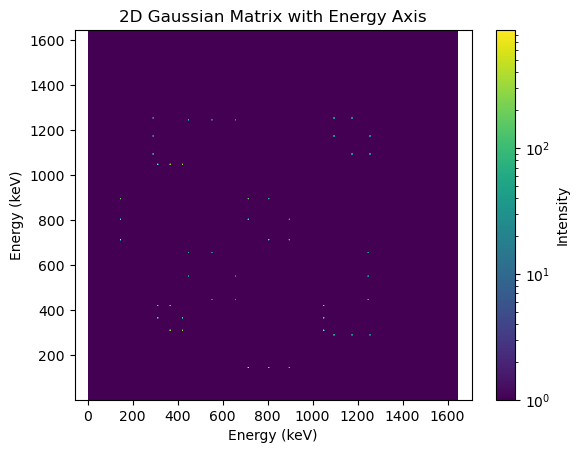

Matrix is symmetric: True


In [240]:
# This cell should be run second. It generates and graphs the 2D matrix based on the parameter generated above.


N = 6000
energy_axis = (0.64844 + 0.27383 * (np.arange(N) - 12.5)) + 6
X, Y = np.meshgrid(energy_axis, energy_axis)
matrix = np.zeros((N, N), dtype=np.float32)

# peak paramter generation
def index_to_energy(index):
    return (0.64844 + 0.27383 * (index - 12.5)) + 6

centers_x = [index_to_energy(t[0]) for t in peak_index_parameter]
centers_y = [index_to_energy(t[1]) for t in peak_index_parameter]
sigmas_x = [0.27383 * (t[0] / 5) for t in peak_width_parameter] 
sigmas_y = [0.27383 * (t[1] / 5) for t in peak_width_parameter]

amplitudes = peak_height_parameter


# how far out gaussians are plotted
cutoff_sigma = 3

# adding gaussians within rectangle
for x0, y0, sx, sy, A in zip(centers_x, centers_y, sigmas_x, sigmas_y, amplitudes):
    xmin = max(0, np.searchsorted(energy_axis, x0 - cutoff_sigma * sx))
    xmax = min(N, np.searchsorted(energy_axis, x0 + cutoff_sigma * sx))
    ymin = max(0, np.searchsorted(energy_axis, y0 - cutoff_sigma * sy))
    ymax = min(N, np.searchsorted(energy_axis, y0 + cutoff_sigma * sy))

    if xmax <= xmin or ymax <= ymin:
        continue

    X_sub = X[ymin:ymax, xmin:xmax]
    Y_sub = Y[ymin:ymax, xmin:xmax]

    G = A * np.exp(-(((X_sub - x0)**2) / (2 * sx**2) + ((Y_sub - y0)**2) / (2 * sy**2)))
    matrix[ymin:ymax, xmin:xmax] += G.astype(np.float32)

matrix += 1

# plotting
plt.imshow(matrix, cmap='viridis', norm=LogNorm(), interpolation='nearest', origin='lower',
           extent=[energy_axis[0], energy_axis[-1], energy_axis[0], energy_axis[-1]])

plt.colorbar(label="Intensity")
plt.title("2D Gaussian Matrix with Energy Axis")
plt.xlabel("Energy (keV)")
plt.ylabel("Energy (keV)")
plt.axis('equal')
plt.show()

is_symmetric = np.allclose(matrix, matrix.T)

print('Matrix is symmetric:', is_symmetric)

[ 141.5  286.4  306.9  362.2  416.7  443.6  547.4  652.   709.5  800.4
  891.  1043.8 1090.1 1169.8 1241.5 1249.7]


()

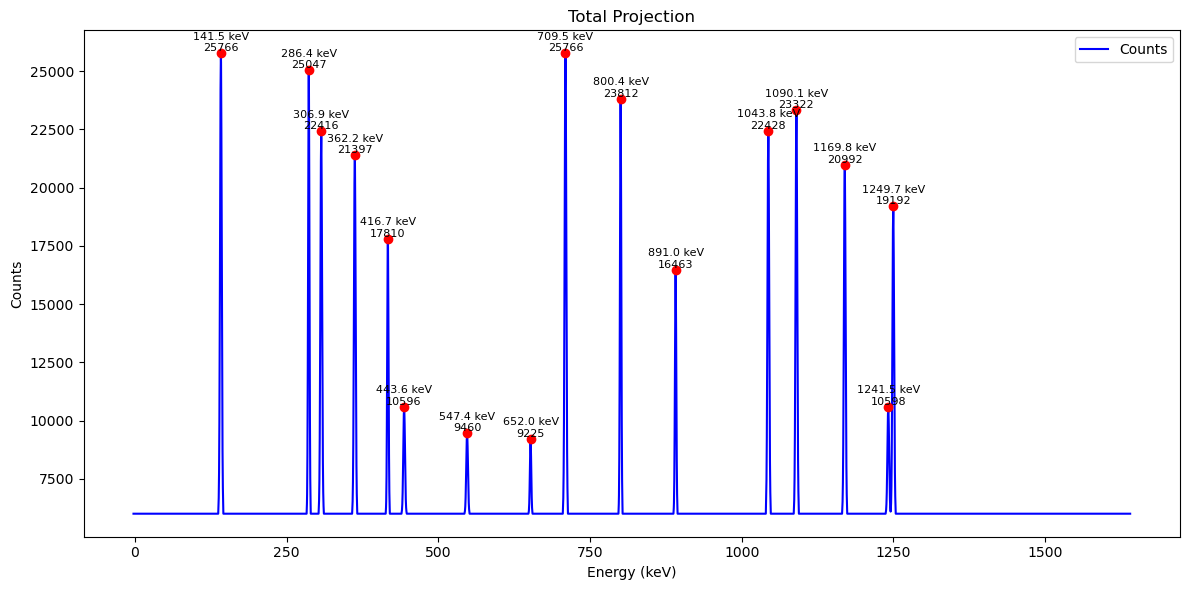

In [242]:
# This cell calls the total projection of the matrix above

TotalProjection(matrix)


Gate Energy? (return to escape) 935
Width (default of 20 keV):  


[1434.  1492.9 1554.5]


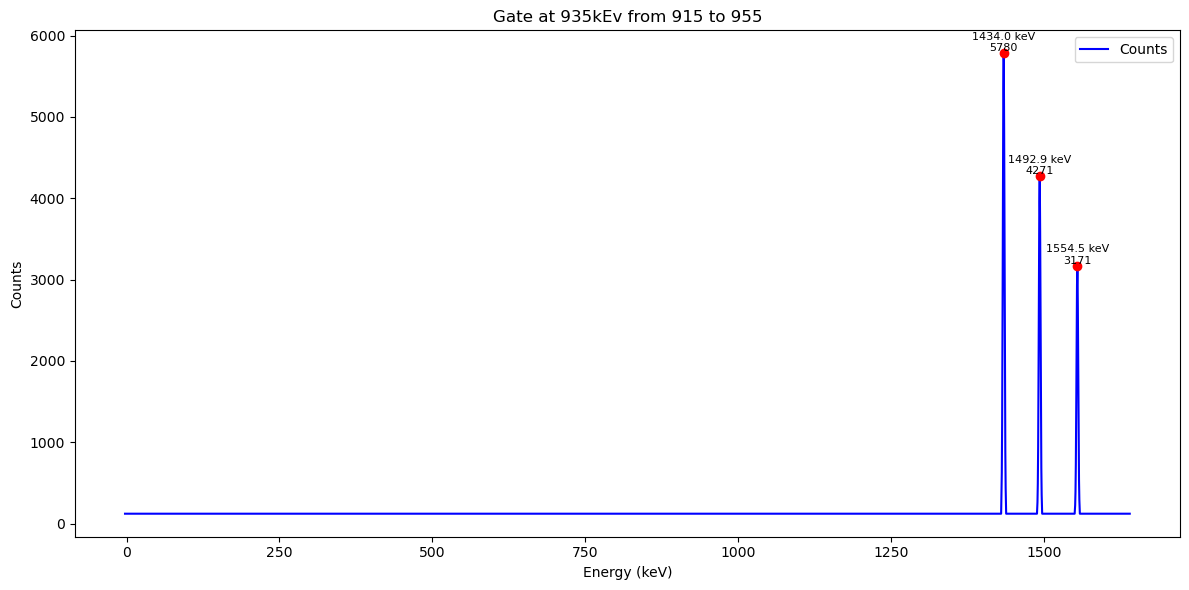

Gate Energy? (return to escape) 


In [222]:
# This cell call the gating function on the matrix above

Gate(matrix)